In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic


from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.callbacks import Callback, TensorBoard, ModelCheckpoint
import tensorflow as tf

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

import tensorflow as tf

import joblib

# Обработка данных

In [165]:
data = pd.read_csv('housing.csv')

In [166]:
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [167]:
x = data.drop(columns = 'MEDV')
y = data['MEDV']

In [164]:
from sklearn import preprocessing

y = y.values.reshape(-1,1)
x = preprocessing.normalize(x)
y = preprocessing.normalize(y)

In [168]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [134]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(391, 3)
(98, 3)
(391, 1)
(98, 1)


In [139]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [111]:
def errors(model, x_test, y_test):
  outputs = model.predict(x_test)
  error = np.absolute(outputs - y_test)
  mae = np.sum(error) / len(error)
  error = (outputs - y_test)**2
  mse = np.sum(error) / len(error)
  print("MAE:", mae) #абсолютная ошибка (MAE)
  print("MSE:", mse) #среднеквадратичная ошибка (MSE)
  print("RMSE:", np.sqrt(mse)) #корень среднеквадратичной ошибки (RMSE)

In [112]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Обучение

В зависимости от вашего задания обучаете свой алгоритм

In [113]:
# Создаём модель леса из сотни деревьев
model = RandomForestRegressor(n_estimators=200, 
                               bootstrap = True,
                               warm_start = True,
                               oob_score = True)
# Обучаем на тренировочных данных
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, oob_score=True, warm_start=True)

In [114]:
errors(model, x_test, y_test)

MAE: 45156.21428571428
MSE: 3374191707.75
RMSE: 58087.79310448969


In [115]:
# Создаём модель леса XGBoost
model = XGBRegressor(seed=42,
                      n_estimators=200,
                      max_depth=6,
                      learning_rate=0.3)
# Обучаем на тренировочных данных
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [116]:
errors(model, x_test, y_test)

MAE: 49959.41725127551
MSE: 3775157748.276848
RMSE: 61442.31236108264


In [117]:
from sklearn.ensemble import AdaBoostRegressor
adab = AdaBoostRegressor(random_state=0, n_estimators=100)
adab.fit(x_train, y_train)
adab.score(x_train, y_train)

0.8629142705979009

In [118]:
errors(adab, x_test, y_test)

MAE: 49140.60690671467
MSE: 3829560792.676502
RMSE: 61883.44522306836


In [119]:
poly = PolynomialFeatures(3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

linear_model = LinearRegression()
poly_model = LinearRegression()

In [120]:
linear_model.fit(x_train, y_train)
linear_model.score(x_train, y_train)
errors(linear_model, x_test, y_test)

MAE: 64277.28865670308
MSE: 6789025559.265864
RMSE: 82395.5433216255


In [121]:
poly_model.fit(x_train_poly, y_train)
poly_model.score(x_train_poly, y_train)
errors(poly_model, x_test_poly, y_test)

MAE: 48324.77705983092
MSE: 3906035332.794268
RMSE: 62498.282638759505


In [122]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [124]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history = model.fit(x_train,y_train,
epochs = 100,
batch_size = 1,
verbose = 1,
validation_data = (x_test,y_test),
callbacks=[checkpoint])

score = model.evaluate(x_test,y_test,verbose = 1)
print("test loss:",score[0])
print("test accuracy:",score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 1s 2ms/step - loss: 0.0096 - mae: 0.0398 - val_loss: 3.3655e-09 - val_mae: 5.0860e-05
Epoch 2/100
391/391 [==============================] - 1s 2ms/step - loss: 1.2236e-09 - mae: 2.9358e-05 - val_loss: 5.2582e-10 - val_mae: 1.9778e-05
Epoch 3/100
391/391 [==============================] - 1s 2ms/step - loss: 3.8743e-10 - mae:

391/391 [==============================] - 1s 2ms/step - loss: 2.2662e-11 - mae: 3.8990e-06 - val_loss: 2.1280e-11 - val_mae: 3.8670e-06
Epoch 26/100
391/391 [==============================] - 1s 2ms/step - loss: 2.1732e-11 - mae: 3.8145e-06 - val_loss: 2.0399e-11 - val_mae: 3.7843e-06
Epoch 27/100
391/391 [==============================] - 1s 2ms/step - loss: 2.0818e-11 - mae: 3.7344e-06 - val_loss: 1.9567e-11 - val_mae: 3.7058e-06
Epoch 28/100
391/391 [==============================] - 1s 2ms/step - loss: 1.9987e-11 - mae: 3.6580e-06 - val_loss: 1.8773e-11 - val_mae: 3.6255e-06
Epoch 29/100
391/391 [==============================] - 1s 2ms/step - loss: 1.9243e-11 - mae: 3.5850e-06 - val_loss: 1.8111e-11 - val_mae: 3.5647e-06
Epoch 30/100
391/391 [==============================] - 1s 2ms/step - loss: 1.8502e-11 - mae: 3.5123e-06 - val_loss: 1.7445e-11 - val_mae: 3.4948e-06
Epoch 31/100
391/391 [==============================] - 1s 2ms/step - loss: 1.7898e-11 - mae: 3.4539e-06 - val_lo

Epoch 81/100
391/391 [==============================] - 1s 2ms/step - loss: 6.2928e-12 - mae: 2.0195e-06 - val_loss: 6.0126e-12 - val_mae: 2.0253e-06
Epoch 82/100
391/391 [==============================] - 1s 2ms/step - loss: 6.2122e-12 - mae: 2.0067e-06 - val_loss: 5.9249e-12 - val_mae: 2.0065e-06
Epoch 83/100
391/391 [==============================] - 1s 2ms/step - loss: 6.1251e-12 - mae: 1.9926e-06 - val_loss: 5.8119e-12 - val_mae: 1.9937e-06
Epoch 84/100
391/391 [==============================] - 1s 2ms/step - loss: 6.0710e-12 - mae: 1.9828e-06 - val_loss: 5.7698e-12 - val_mae: 1.9876e-06
Epoch 85/100
391/391 [==============================] - 1s 2ms/step - loss: 5.9987e-12 - mae: 1.9717e-06 - val_loss: 5.6952e-12 - val_mae: 1.9663e-06
Epoch 86/100
391/391 [==============================] - 1s 2ms/step - loss: 5.9006e-12 - mae: 1.9549e-06 - val_loss: 5.6237e-12 - val_mae: 1.9560e-06
Epoch 87/100
391/391 [==============================] - 1s 2ms/step - loss: 5.8466e-12 - mae: 1.9456

Text(0, 0.5, 'loss')

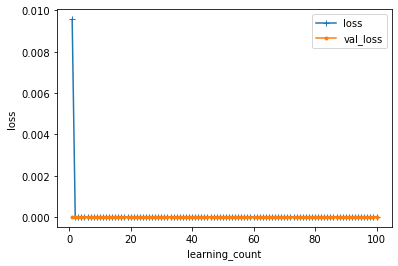

In [125]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

learning_count = len(loss)+1

plt.plot(range(1,learning_count),loss,marker = "+",label = "loss")
plt.plot(range(1,learning_count),val_loss,marker = ".",label = "val_loss")
plt.legend(loc = "best",fontsize = 10)
plt.xlabel("learning_count")
plt.ylabel("loss")

Text(0, 0.5, 'acc')

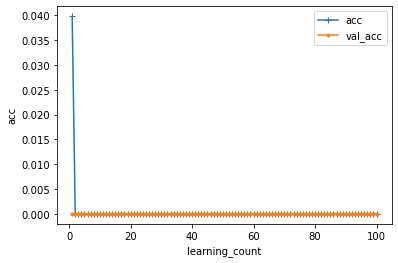

In [126]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]

learning_count = len(loss)+1

plt.plot(range(1,learning_count),loss,marker = "+",label = "acc")
plt.plot(range(1,learning_count),val_loss,marker = ".",label = "val_acc")
plt.legend(loc = "best",fontsize = 10)
plt.xlabel("learning_count")
plt.ylabel("acc")